In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import time

from scipy.stats import linregress
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Combine lists
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-5.908841306273018, 98.64629489795357),
 (-16.969854280081847, 179.86006076016156),
 (1.1702053997649102, -104.33775894874809),
 (-52.10064168990714, 141.60773095695959),
 (40.48692742525745, 81.46720292158255),
 (-4.607664746601273, -106.26830602599549),
 (-65.72965289502352, 146.59422750408754),
 (-25.33946523165575, 129.870482963828),
 (-18.860968193756648, 74.00795842035953),
 (17.876023618237753, -164.9719559907791),
 (-57.30278180757529, -116.8958705841174),
 (-47.86713598186928, 172.88144824623043),
 (-77.57720508067787, 106.37528744964203),
 (-33.93940165499824, -136.72434629387152),
 (7.228183737324159, -163.83330208368795),
 (-77.33083807232283, 23.132012686798646),
 (71.53271500574826, 152.9973644019923),
 (-41.05434179091464, 131.28034585234167),
 (75.06406526608839, -18.36795809802598),
 (4.480643943396345, -21.345790902143875),
 (-6.065032323146909, -174.05324575325992),
 (81.0180292141261, 39.62595501043174),
 (47.06260938672625, -95.38953415105412),
 (46.0040106532617

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bengkulu
Processing Record 2 of Set 1 | asau
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | aksu
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | yulara
Processing Record 8 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | dunedin
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | makakilo city
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | srednekolymsk
Processing Record 16 of Set 1 | port lincoln
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | bubaque
Processing Record 19 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 1 | tumannyy
City not found. Skipp

Processing Record 38 of Set 4 | sabang
Processing Record 39 of Set 4 | kavieng
Processing Record 40 of Set 4 | the valley
Processing Record 41 of Set 4 | japura
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | okulovka
Processing Record 44 of Set 4 | naze
Processing Record 45 of Set 4 | erenhot
Processing Record 46 of Set 4 | santa cruz del sur
Processing Record 47 of Set 4 | faanui
Processing Record 48 of Set 4 | thoen
Processing Record 49 of Set 4 | princeton
Processing Record 50 of Set 4 | marinette
Processing Record 1 of Set 5 | honiara
Processing Record 2 of Set 5 | port elizabeth
Processing Record 3 of Set 5 | itapeva
Processing Record 4 of Set 5 | saint george
Processing Record 5 of Set 5 | qasigiannguit
Processing Record 6 of Set 5 | laguna
Processing Record 7 of Set 5 | hofn
Processing Record 8 of Set 5 | geraldton
Processing Record 9 of Set 5 | ketchikan
Processing Record 10 of Set 5 | atar
Processing Record 11 of Set 5 | ivdel
Processing Record 12 of Set

Processing Record 29 of Set 8 | hambantota
Processing Record 30 of Set 8 | tekeli
Processing Record 31 of Set 8 | port said
Processing Record 32 of Set 8 | murray bridge
Processing Record 33 of Set 8 | lincoln
Processing Record 34 of Set 8 | northam
Processing Record 35 of Set 8 | kovdor
Processing Record 36 of Set 8 | solms
Processing Record 37 of Set 8 | chuy
Processing Record 38 of Set 8 | puerto del rosario
Processing Record 39 of Set 8 | omachi
Processing Record 40 of Set 8 | ornskoldsvik
Processing Record 41 of Set 8 | takoradi
Processing Record 42 of Set 8 | vao
Processing Record 43 of Set 8 | the hammocks
Processing Record 44 of Set 8 | wattegama
Processing Record 45 of Set 8 | sao joao da barra
Processing Record 46 of Set 8 | viedma
Processing Record 47 of Set 8 | nemuro
Processing Record 48 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 49 of Set 8 | nerchinskiy zavod
Processing Record 50 of Set 8 | spirovo
Processing Record 1 of Set 9 | strezhevoy
Processi

Processing Record 21 of Set 12 | zhigansk
Processing Record 22 of Set 12 | asfi
Processing Record 23 of Set 12 | kailua
Processing Record 24 of Set 12 | la ronge
Processing Record 25 of Set 12 | bathsheba
Processing Record 26 of Set 12 | qom
Processing Record 27 of Set 12 | bhatkal
Processing Record 28 of Set 12 | yarkovo
Processing Record 29 of Set 12 | portland
Processing Record 30 of Set 12 | solwezi
Processing Record 31 of Set 12 | villefontaine
Processing Record 32 of Set 12 | solnechnyy
Processing Record 33 of Set 12 | mahibadhoo
Processing Record 34 of Set 12 | lazaro cardenas
Processing Record 35 of Set 12 | cabedelo
Processing Record 36 of Set 12 | shumerlya
Processing Record 37 of Set 12 | oistins
Processing Record 38 of Set 12 | matara
Processing Record 39 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 40 of Set 12 | minsk
Processing Record 41 of Set 12 | dakar
Processing Record 42 of Set 12 | villa carlos paz
Processing Record 43 of Set 12 | saquena
Pr

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.80,102.27,76.55,88,94,3.56,ID,2020-10-19 17:00:36
1,Asau,46.43,26.40,50.00,61,2,11.41,RO,2020-10-19 17:01:04
2,Puerto Ayora,-0.74,-90.35,77.00,69,75,9.17,EC,2020-10-19 17:01:04
3,New Norfolk,-42.78,147.06,42.01,80,39,2.33,AU,2020-10-19 17:01:04
4,Aksu,41.12,80.26,51.78,41,0,1.16,CN,2020-10-19 17:01:05
5,Hobart,-42.88,147.33,46.40,87,39,5.82,AU,2020-10-19 16:59:19
6,Yulara,-25.24,130.99,68.00,82,30,13.87,AU,2020-10-19 17:01:05
7,Kapaa,22.08,-159.32,75.00,59,1,1.99,US,2020-10-19 17:01:05
8,Rikitea,-23.12,-134.97,73.63,79,0,14.79,PF,2020-10-19 17:00:37
9,Dunedin,-45.87,170.50,46.99,81,25,3.00,NZ,2020-10-19 17:01:06


In [7]:
# Rearrange columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bengkulu,ID,2020-10-19 17:00:36,-3.80,102.27,76.55,88,94,3.56
1,Asau,RO,2020-10-19 17:01:04,46.43,26.40,50.00,61,2,11.41
2,Puerto Ayora,EC,2020-10-19 17:01:04,-0.74,-90.35,77.00,69,75,9.17
3,New Norfolk,AU,2020-10-19 17:01:04,-42.78,147.06,42.01,80,39,2.33
4,Aksu,CN,2020-10-19 17:01:05,41.12,80.26,51.78,41,0,1.16
5,Hobart,AU,2020-10-19 16:59:19,-42.88,147.33,46.40,87,39,5.82
6,Yulara,AU,2020-10-19 17:01:05,-25.24,130.99,68.00,82,30,13.87
7,Kapaa,US,2020-10-19 17:01:05,22.08,-159.32,75.00,59,1,1.99
8,Rikitea,PF,2020-10-19 17:00:37,-23.12,-134.97,73.63,79,0,14.79
9,Dunedin,NZ,2020-10-19 17:01:06,-45.87,170.50,46.99,81,25,3.00


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

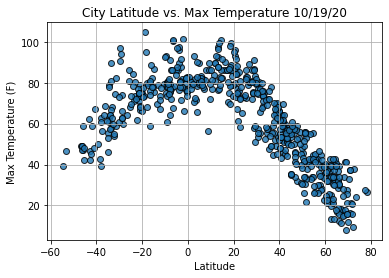

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

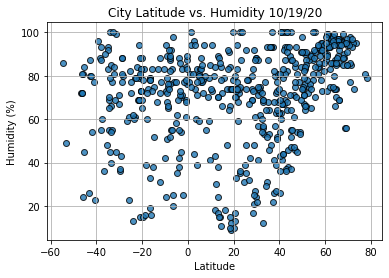

In [10]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

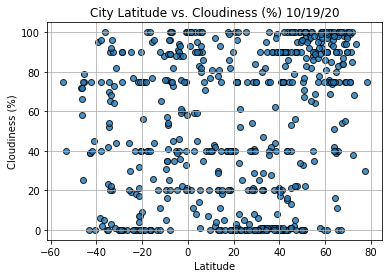

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

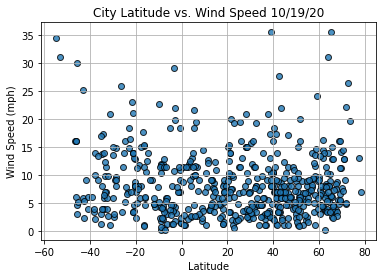

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [40]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.title(title)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [14]:
# Df loc test
index13 = city_data_df.loc[13]
index13

City                Srednekolymsk
Country                        RU
Date          2020-10-19 17:01:06
Lat                         67.45
Lng                        153.68
Max Temp                    16.72
Humidity                       96
Cloudiness                     84
Wind Speed                   3.65
Name: 13, dtype: object

In [15]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
569    False
570     True
571    False
572    False
573     True
Name: Lat, Length: 574, dtype: bool

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

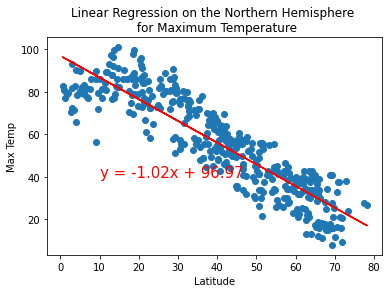

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))


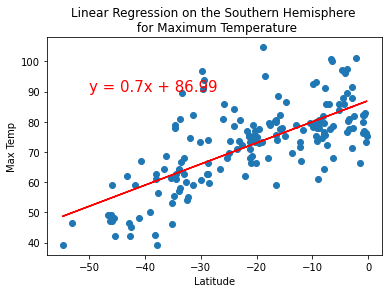

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

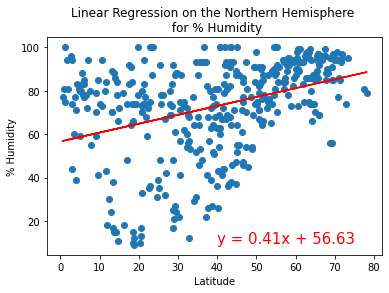

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

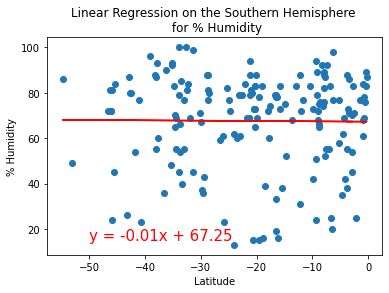

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

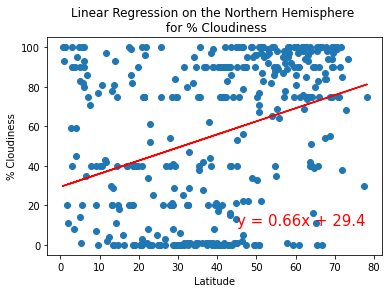

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,10))

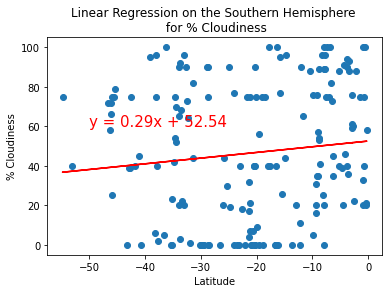

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

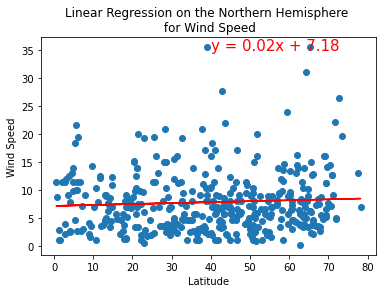

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

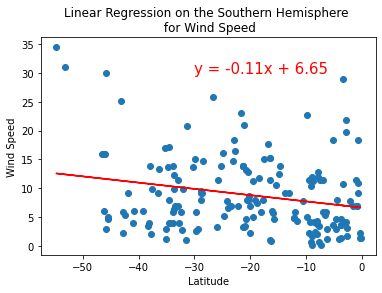

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,30))